In [2]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 2.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [10]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [14]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

for col in df.select_dtypes(include='object'):
    if col != 'Attrition':
        df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       380
           1       0.32      0.16      0.22        61

    accuracy                           0.84       441
   macro avg       0.60      0.55      0.56       441
weighted avg       0.80      0.84      0.81       441



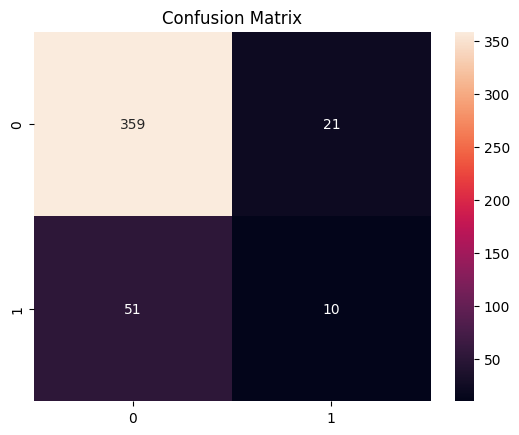

In [18]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [19]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())


Weight,Feature
0.0177 ± 0.0083,OverTime
0.0118 ± 0.0123,MonthlyIncome
0.0036 ± 0.0171,StockOptionLevel
0.0032 ± 0.0098,MaritalStatus
0.0032 ± 0.0074,TotalWorkingYears
0.0023 ± 0.0149,JobSatisfaction
0.0018 ± 0.0113,YearsSinceLastPromotion
0.0014 ± 0.0046,PercentSalaryHike
0.0000 ± 0.0057,DailyRate
0 ± 0.0000,StandardHours


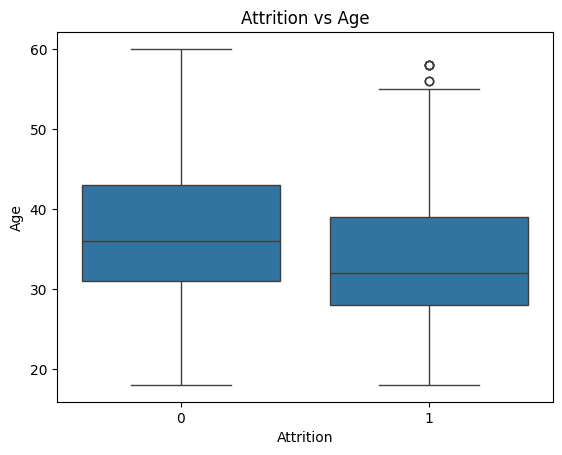

In [20]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition vs Age')
plt.show()

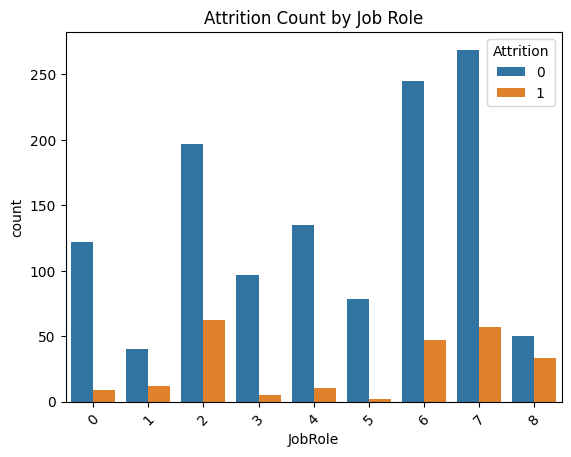

In [21]:
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition Count by Job Role')
plt.xticks(rotation=45)
plt.show()
